<a href="https://colab.research.google.com/github/kapil0808/Kaggle-first-problem/blob/main/Sentiment_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK tools for text processing
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [32]:
import spacy.cli
spacy.cli.download("pt_core_news_sm")

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [33]:
import pt_core_news_sm

spc_pt = pt_core_news_sm.load()

In [4]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_order_reviews_dataset.csv')
data.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [5]:
data.drop(['order_id', 'review_creation_date', 'review_answer_timestamp'],
          1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   review_id               100000 non-null  object
 1   review_score            100000 non-null  int64 
 2   review_comment_title    11715 non-null   object
 3   review_comment_message  41753 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [8]:
duplicate=round(sum(data.duplicated("review_id"))/len(data)*100, 2)
print( 'Duplicate values in percentage',duplicate,'%')

Duplicate values in percentage 0.83 %


In [9]:
data[data.duplicated("review_id", keep =  False)].sort_values(by = "review_id")

,review_id,review_score,review_comment_title,review_comment_message
47045,00130cbe1f9d422698c812ed8ded1919,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid..."
30062,00130cbe1f9d422698c812ed8ded1919,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid..."
63695,0115633a9c298b6a98bcbe4eee75345f,5,NaN,NaN
91399,0115633a9c298b6a98bcbe4eee75345f,5,NaN,NaN
57727,0174caf0ee5964646040cd94e15ac95e,1,NaN,Produto entregue dentro de embalagem do fornec...
...,...,...,...,...
40677,fe5c833752953fed3209646f1f63b53c,1,NaN,"Comprei dois produtos e ambos, mesmo enviados ..."
7924,ff2fc9e68f8aabfbe18d710b83aabd30,2,NaN,NaN
83183,ff2fc9e68f8aabfbe18d710b83aabd30,2,NaN,NaN
1997,ffb8cff872a625632ac983eb1f88843c,3,NaN,NaN


In [10]:
data.drop_duplicates("review_id", inplace = True) #Removed duplicate

In [11]:
data.fillna('', inplace = True) 

In [12]:
#combine coment title and message
data['review'] = data['review_comment_title'] + ' ' + data['review_comment_message']

In [16]:
data = data[data['review'] != ' ']

In [17]:
data.head(10)

,review_id,review_score,review_comment_title,review_comment_message,review
3,e64fb393e7b32834bb789ff8bb30750e,5,,Recebi bem antes do prazo estipulado.,Recebi bem antes do prazo estipulado.
4,f7c4243c7fe1938f181bec41a392bdeb,5,,Parabéns lojas lannister adorei comprar pela I...,Parabéns lojas lannister adorei comprar pela ...
9,8670d52e15e00043ae7de4c01cc2fe06,4,recomendo,aparelho eficiente. no site a marca do aparelh...,recomendo aparelho eficiente. no site a marca ...
12,4b49719c8a200003f700d3d986ea1a19,4,,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,3948b09f7c818e2d86c9a546758b2335,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...","Super recomendo Vendedor confiável, produto ok..."
16,9314d6f9799f5bfba510cc7bcd468c01,2,,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...","GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI ..."
19,373cbeecea8286a2b66c97b1b157ec46,1,Não chegou meu produto,Péssimo,Não chegou meu produto Péssimo
22,d21bbc789670eab777d27372ab9094cc,5,Ótimo,Loja nota 10,Ótimo Loja nota 10
24,0e0190b9db53b689b285d3f3916f8441,5,,obrigado pela atençao amim dispensada,obrigado pela atençao amim dispensada
27,fe3db7c069d694bab50cc43463f91608,5,,A compra foi realizada facilmente.\r\nA entreg...,A compra foi realizada facilmente.\r\nA entre...


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 3 to 99999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               43152 non-null  object
 1   review_score            43152 non-null  int64 
 2   review_comment_title    43152 non-null  object
 3   review_comment_message  43152 non-null  object
 4   review                  43152 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [19]:
# review score
data['review_score'].value_counts()

5    21762
1     9153
4     6296
3     3721
2     2220
Name: review_score, dtype: int64

In [20]:
labels = []

for score in data['review_score']:
  if score > 3:
    labels.append(1)
  else:
    labels.append(0)

data['label'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [21]:
data.head(5)

,review_id,review_score,review_comment_title,review_comment_message,review,label
3,e64fb393e7b32834bb789ff8bb30750e,5,,Recebi bem antes do prazo estipulado.,Recebi bem antes do prazo estipulado.,1
4,f7c4243c7fe1938f181bec41a392bdeb,5,,Parabéns lojas lannister adorei comprar pela I...,Parabéns lojas lannister adorei comprar pela ...,1
9,8670d52e15e00043ae7de4c01cc2fe06,4,recomendo,aparelho eficiente. no site a marca do aparelh...,recomendo aparelho eficiente. no site a marca ...,1
12,4b49719c8a200003f700d3d986ea1a19,4,,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","Mas um pouco ,travando...pelo valor ta Boa.\r\n",1
15,3948b09f7c818e2d86c9a546758b2335,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...","Super recomendo Vendedor confiável, produto ok...",1


<Figure size 576x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


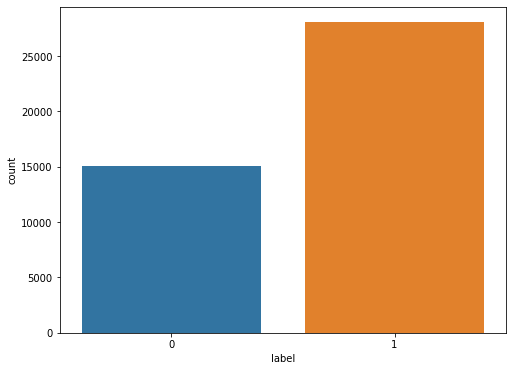

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data['label'])
plt.show()

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
stopwords_pt = stopwords.words("portuguese")

In [25]:
stopwords_pt.remove('não')
stopwords_pt.remove('nem')

In [34]:
def simple_text(text):

  text = text.lower()

  text = re.sub(r"[\W\d_]+", " ", text)

  text = [t for t in text.split() if t not in stopwords_pt]

  specific_text = spc_pt(" ".join(text))
  tokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in specific_text]
  
  return " ".join(tokens)

In [35]:
data['review'] = data['review'].apply(simple_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 3 to 99999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               43152 non-null  object
 1   review_score            43152 non-null  int64 
 2   review_comment_title    43152 non-null  object
 3   review_comment_message  43152 non-null  object
 4   review                  43152 non-null  object
 5   label                   43152 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.6+ MB


In [37]:
data.head(10)

,review_id,review_score,review_comment_title,review_comment_message,review,label
3,e64fb393e7b32834bb789ff8bb30750e,5,,Recebi bem antes do prazo estipulado.,receber bem antar prazo estipular,1
4,f7c4243c7fe1938f181bec41a392bdeb,5,,Parabéns lojas lannister adorei comprar pela I...,parabém loja lannister adorar comprar internet...,1
9,8670d52e15e00043ae7de4c01cc2fe06,4,recomendo,aparelho eficiente. no site a marca do aparelh...,recomendar aparelhar eficiente site marcar apa...,1
12,4b49719c8a200003f700d3d986ea1a19,4,,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",pouco travar valor ta bom,1
15,3948b09f7c818e2d86c9a546758b2335,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",super recomendar vendedor confiável produto ok...,1
16,9314d6f9799f5bfba510cc7bcd468c01,2,,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",gostar saber sempre receber comprar agora decp...,0
19,373cbeecea8286a2b66c97b1b157ec46,1,Não chegou meu produto,Péssimo,não chegar produto mau,0
22,d21bbc789670eab777d27372ab9094cc,5,Ótimo,Loja nota 10,ótimo loja noto,1
24,0e0190b9db53b689b285d3f3916f8441,5,,obrigado pela atençao amim dispensada,obrigar atençao amim dispensar,1
27,fe3db7c069d694bab50cc43463f91608,5,,A compra foi realizada facilmente.\r\nA entreg...,comprar realizar facilmente entregar efetuada ...,1


In [ ]:
data.to_csv('olist_preprocessado.csv', index= False, columns= ['review_id', 'review', 'label'])

### Feature extraction

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
vectorizer = CountVectorizer(binary=True, max_features=5000)

text = data['review']
X_bow = vectorizer.fit_transform(text)

In [40]:
X_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
print(X_bow.shape, type(X_bow))

(43152, 5000) <class 'scipy.sparse.csr.csr_matrix'>


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf_vect = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vect.fit_transform(text)

In [44]:
print(X_tfidf)

  (0, 1881)	0.6929845750066604
  (0, 3663)	0.30582204275116415
  (0, 269)	0.3529748289184372
  (0, 582)	0.427882135533294
  (0, 3999)	0.34434126272030036
  (1, 3873)	0.47846657405507714
  (1, 2058)	0.30329552333345583
  (1, 4630)	0.2122474442238849
  (1, 3846)	0.32356855001772633
  (1, 4330)	0.3310383748193441
  (1, 2562)	0.3119241979143323
  (1, 1022)	0.12848597336592513
  (1, 85)	0.21633389797703662
  (1, 2675)	0.20446904414639935
  (1, 2783)	0.16840400503886988
  (1, 3376)	0.4347141225647072
  (2, 4854)	0.1814515363850349
  (2, 1183)	0.16522865072114531
  (2, 447)	0.2956163037497707
  (2, 3176)	0.23428956353367472
  (2, 3333)	0.14549731589476161
  (2, 881)	0.09509560984556845
  (2, 2443)	0.2956163037497707
  (2, 2887)	0.4008826329682664
  (2, 4409)	0.1489824858652298
  :	:
  (43150, 3741)	0.2994377062482914
  (43150, 841)	0.30781230058090403
  (43150, 799)	0.20544467778376035
  (43150, 2665)	0.4633785668468095
  (43150, 1496)	0.18814234453676615
  (43150, 3009)	0.18927772028998993
 

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_bow, data['label'],
                                                        test_size=0.3, random_state = 10)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_tfidf, data['label'],
                                                        test_size=0.3, random_state = 10)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

In [53]:
def Result(y_true, y_pred):

  print("\nAccuracy : ", accuracy_score(y_true, y_pred))
  print("\nAUC_ROC:", roc_auc_score(y_true, y_pred))
  print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))
  print("\nconfusion_matrix:")
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
  plt.show()

Logistic Regression

Bag of Words

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy :  0.8951799783716978

AUC_ROC: 0.8774503728996279

F1-Score: 0.8943670107059343

confusion_matrix:


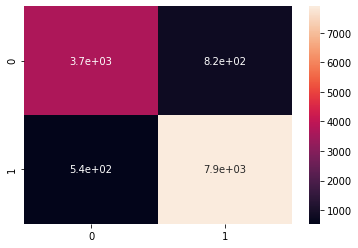

In [54]:
LR = LogisticRegression()
LR.fit(X1_train, y1_train)
y1_LR_pred = LR.predict(X1_test)
Result(y1_test, y1_LR_pred)

 tf-idf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy :  0.8995056388073536

AUC_ROC: 0.8862841659981466

F1-Score: 0.8991861711514488

confusion_matrix:


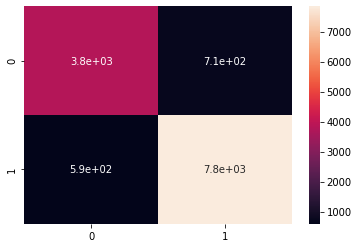

In [55]:
reglog2 = LogisticRegression()

reglog2.fit(X2_train, y2_train)

y2_reglog_pred = reglog2.predict(X2_test)

Result(y2_test, y2_reglog_pred)

### Naive Bayes Multinomial

BOW

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Accuracy :  0.8879962922910551

AUC_ROC: 0.8782753802155072

F1-Score: 0.8881718315667444

confusion_matrix:


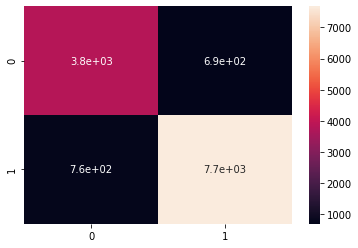

In [56]:
from sklearn.naive_bayes import MultinomialNB
nb1 = MultinomialNB()

nb1.fit(X1_train.toarray(), y1_train)

y1_gnb_pred = nb1.predict(X1_test.toarray())

Result(y1_test, y1_gnb_pred)

Tf-idf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Accuracy :  0.8896956588907771

AUC_ROC: 0.8789097121663917

F1-Score: 0.8897352775586546

confusion_matrix:


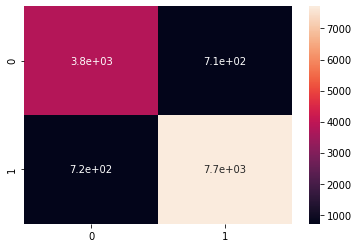

In [57]:
nb2 = MultinomialNB()

nb2.fit(X2_train.toarray(), y2_train)

y2_gnb_pred = nb2.predict(X2_test.toarray())
Result(y2_test, y2_gnb_pred)

### Random Forest

BOW

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy :  0.8945620268808898

AUC_ROC: 0.8849119918617147

F1-Score: 0.8946667153275362

confusion_matrix:


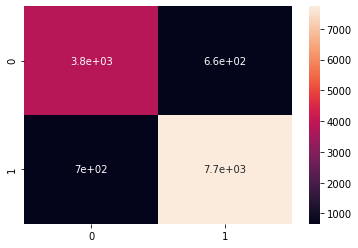

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()

rf1.fit(X1_train, y1_train)

y1_dt_pred = rf1.predict(X1_test)

Result(y1_test, y1_dt_pred)

Tf-idf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy :  0.8940213193264329

AUC_ROC: 0.8865582749744785

F1-Score: 0.8943522117520228

confusion_matrix:


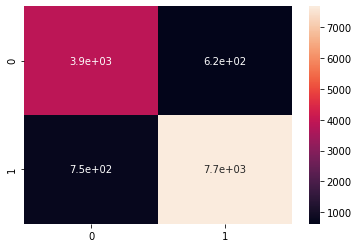

In [59]:
rf2 = RandomForestClassifier()

rf2.fit(X2_train, y2_train)

y2_dt_pred = rf2.predict(X2_test)

Result(y2_test, y2_dt_pred)

In [63]:
def new_predictor(text):
  
  text_vectorize = tfidf_vect.transform([text])
  pred = reglog2.predict(text_vectorize )

  if pred == 0:
    print("review is negative.")
  else:
    print("review is positive.")

In [64]:
new_predictor("Demorou muito não gostei")

review is negative.


In [65]:
new_predictor("Achei cheirosinho")

review is positive.


In [66]:
new_predictor("Nossa que produto ruim é esse parece que encontrei no lixo")

review is negative.
